### Installation of necessary libraries

In [ ]:
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 66.1 MB/s 
     |████████████████████████████████| 743 kB 66.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp import NLTKTokenizer

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Importing the dataset

In [ ]:
!unzip '/content/drive/MyDrive/Bangla News Dataset/data_v2.json.zip' -d '/content/drive/MyDrive/Bangla News Dataset'

Archive:  /content/drive/MyDrive/Bangla News Dataset/data_v2.json.zip
  inflating: /content/drive/MyDrive/Bangla News Dataset/data_v2.json  


In [ ]:
df = pd.read_json('/content/drive/MyDrive/Bangla News Dataset/data_v2.json')
df.head()

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭",[গাজীপুর],0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",http://www.prothom-alo.com/bangladesh/article/...,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",[টেনিস],0,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,http://www.prothom-alo.com/sports/article/19028,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",[রাজনীতি],0,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,http://www.prothom-alo.com/bangladesh/article/...,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",[গবেষণা],0,পাসওয়ার্ড ভুলে যান!,http://www.prothom-alo.com/technology/article/...,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",[কম্পিউটার],0,চলে গেলেন মাউস উদ্ভাবক,http://www.prothom-alo.com/technology/article/...,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [ ]:
df.shape

(408471, 10)

In [ ]:
news_df=df[['title','content','category']]
news_df['category'].value_counts().drop('opinion')

bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
technology        12116
life-style        10852
education          9721
Name: category, dtype: int64

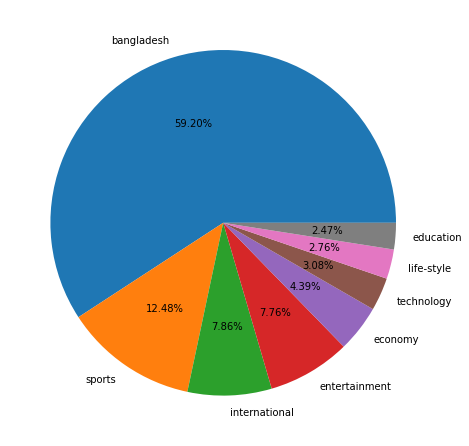

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(news_df['category'].value_counts().drop('opinion').values, 
       labels = news_df['category'].value_counts().drop('opinion').index,autopct='%1.2f%%')
plt.show()

In [ ]:
df_bangladesh=news_df[news_df['category']=='bangladesh'][:9721]
df_sports=news_df[news_df['category']=='sports'][:9721]
df_international=news_df[news_df['category']=='international'][:9721]
df_entertainment=news_df[news_df['category']=='entertainment'][:9721]
df_economy=news_df[news_df['category']=='economy'][:9721]
df_opinion=news_df[news_df['category']=='opinion'][:9721]
df_technology=news_df[news_df['category']=='technology'][:9721]
df_life_style=news_df[news_df['category']=='life-style'][:9721]
df_education=news_df[news_df['category']=='education']

In [ ]:
news_df=pd.concat([df_bangladesh,df_sports,df_international,df_entertainment,df_economy,df_technology,
                   df_life_style,df_education])
news_df.shape

(77768, 3)

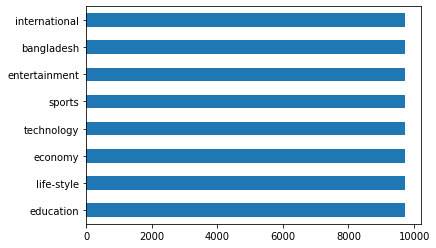

In [ ]:
news_df['category'].value_counts().plot(kind='barh');

In [ ]:
news_df.head()

,title,content,category
0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...,bangladesh
6,খালেদা দুষ্টু কথা বলেছেন: স্বরাষ্ট্রমন্ত্রী,যুক্তরাষ্ট্রের বাজারে জিএসপি-সুবিধা বন্ধ হওয়া...,bangladesh
7,আরও ১১টি বিমা কোম্পানি অনুমোদন পেল,১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন দিয়েছ...,bangladesh
8,সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট,ম্যাজিস্ট্রেটের মাধ্যমে সিলেটে সিএনজি স্টেশনের...,bangladesh


In [ ]:
news_df['content'][0]

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

### Data preprocessing
> **`Cleaning the text`**

In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits

print(stopwords)
print(punctuations)
print(letters)
print(digits)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [ ]:
remove_words=stopwords+list(punctuations)+list(letters)+list(digits)

In [ ]:
from bnlp.corpus.util import remove_stopwords
list_df=[]
for i in range(len(news_df)):
  result1=remove_stopwords(news_df.iloc[i,0],remove_words) # removing stopwords,punctuations,letters,digits
  result2=remove_stopwords(news_df.iloc[i,1],remove_words)
  list_df.append([result1,result2,news_df.iloc[i,-1]])

In [ ]:
import pickle
with open("Cleaned_txt.bin", "wb") as output:
    pickle.dump(list_df, output)

In [ ]:
with open("Cleaned_txt.bin", "rb") as data:
  W = pickle.load(data)

In [ ]:
!mv "/content/Cleaned_txt.bin" "/content/drive/MyDrive/Bangla News Dataset"

> **Stemming**

In [ ]:
!pip install bangla-stemmer

In [ ]:
list_df[0][2]

'bangladesh'

In [ ]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()
stem_df=[]
for i in range(len(list_df)):
  stem1=stmr.stem(list_df[i][0])
  stem2=stmr.stem(list_df[i][1])
  stem_df.append([stem1,stem2,[list_df[i][-1]]])

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..


In [ ]:
import pickle
with open("Stemmed_txt.bin", "wb") as output:
    pickle.dump(stem_df, output)

In [ ]:
!mv "/content/Stemmed_txt.bin" "/content/drive/MyDrive/Bangla News Dataset"

### Load the stemmed_text

In [ ]:
import pickle
with open("/content/drive/MyDrive/Bangla News Dataset/Stemmed_txt.bin", "rb") as data:
  stemmed_txt = pickle.load(data)

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=[cat[-1][0] for cat in stemmed_txt]
le = LabelEncoder()
y = le.fit_transform(y)
pd.Series(y).value_counts().plot(kind='bar');

In [ ]:
import re
corpus={'title':[],'content':[],'label':[]}
for i in range(len(stemmed_txt)):
  title = ' '.join(stemmed_txt[i][0])
  title=" ".join(re.sub('[০১২৩৪৫৬৭৮৯\‘\’a-zA-Z0-9\-\_\–\—]', '', title).split())
  corpus['title'].append(title)
  content=' '.join(stemmed_txt[i][1])
  content=" ".join(re.sub('[০১২৩৪৫৬৭৮৯\‘\’a-zA-Z0-9\-\_\–\—]', '', content).split())
  corpus['content'].append(content)
  corpus['label'].append(stemmed_txt[i][-1][0])

In [ ]:
finalized_df=pd.DataFrame(corpus)
finalized_df.dropna(inplace=True)
finalized_df.head()

,title,content,label
0,কালিয়াকৈরে টিফিন খেয়ে শ্রমিক অসুস্থ বিক্ষোভ,গাজীপুর কালিয়াকৈর উপজেল তেলিরচালা এলাকায় বৃহ...,bangladesh
1,সংসদে খালেদ অভিযোগ জবাব ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
2,খালেদা দুষ্টু কথা স্বরাষ্ট্রমন্ত্রী,যুক্তরাষ্ট্র বাজারে জিএসপি সুবিধা বন্ধ প্রসঙ্গ...,bangladesh
3,বিমা কোম্পানি অনুমোদন পেল,বিমা কোম্পানি লাইসেন্স অনুমোদন বিমা উন্নয়ন নি...,bangladesh
4,সিএনজি স্টেশনে কাল অনির্দিষ্টকাল ধর্মঘট,ম্যাজিস্ট্রেটের সিলেট সিএনজি স্টেশন এক মালিক ল...,bangladesh


### Save the finalized array to drive

In [ ]:
with open('drive/MyDrive/Bangla News Dataset/finalized_array.npy', 'wb') as f:
    np.save(f, finalized_df.values)

### Load the finalized array from drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
%matplotlib inline

In [ ]:
with open('drive/MyDrive/Bangla News Dataset/finalized_array.npy', 'rb') as f:
  finalized_df = pd.DataFrame(np.load(f,allow_pickle=True),columns=['title','content','label'])

In [ ]:
finalized_df.iloc[0,1]

'গাজীপুর কালিয়াকৈর উপজেল তেলিরচালা এলাকায় বৃহস্পতিব রাত টিফিন খেয়ে পোশাক কারখ শ্রমিক অসুস্থ পড়েছেন ঘটনায় বিক্ষোভ কারখ শ্রমিকেরা সফিপুর মডার্ন হাসপাতাল জরুরি বিভাগ চিকিত্সক আল আমিন আলো ডটকম খাদ্যে বিষক্রিয়ায় শ্রমিকেরা অসুস্থ পড়েছেন আতঙ্কিত অসুস্থ চিকিত্সা কারখ শ্রমিক পুলিশ সূত্রে উপজেল তেলিরচালা এল সেজাদ সোয়ে লিমিটেড কারখ শ্রমিক রাত সাড়ে সাত টিফিন টিফিনে ডিম রুটি পেট কলা টিফিন খেয়ে শ্রমিকেরা যথারীতি যোগ টিফিন খাওয় এক ঘণ্ রাত সাড়ে আট কয়েকজন শ্রমিক বমি পেট ব্যথা এরপর ধীরে ধীরে পুরো কারখ শ্রমিকেরা অসুস্থ কারখ মাঝ ঢলে পড়ে পাঁচ শতাধিক শ্রমিক অসুস্থ পড়ে কারখানা কর্তৃপক্ষ দ্রুত যানবাহন ব্যবস্থা সফিপুর জেনারেল হাসপাতাল সফিপুর মডার্ন হাসপাতাল উপজেলা স্বাস্থ্য কমপ্লেক্সসহ ক্লিনি ভর্তি বাসি পচা খাবা দেওয়ায় শ্রমিক ক্ষুব্ধ কারখ বিক্ষোভ খবর পুলিশ শ্রমিক বুঝিয়ে খাবা সরবরাহ প্রতিষ্ঠান বিরুদ্ধে ব্যবস্থা আশ্বাস দিলে শ্রমিকেরা শান্ত সফিপুর জেনারেল হাসপাতালে ভর্তি শ্রমিক জাকির হোস আসমা আক্ত টিফিন খাওয় সময় ডিম কেক দুর্গন্ধ বের হচ্ছিল কারণে খাবা খায়নি বেশির ভাগ শ্রমিক খাবা খেয় কারখ সহক


Class Name :  economy
Number of Documents:9721
Number of Words:1753249
Number of Unique Words:54478

Class Name :  technology
Number of Documents:9721
Number of Words:1439934
Number of Unique Words:64296

Class Name :  international
Number of Documents:9721
Number of Words:1445024
Number of Unique Words:66371

Class Name :  education
Number of Documents:9721
Number of Words:1651977
Number of Unique Words:94153

Class Name :  sports
Number of Documents:9721
Number of Words:1601849
Number of Unique Words:57735

Class Name :  entertainment
Number of Documents:9721
Number of Words:1417945
Number of Unique Words:67747

Class Name :  bangladesh
Number of Documents:9721
Number of Words:1651030
Number of Unique Words:58941

Class Name :  life-style
Number of Documents:9721
Number of Words:2616021
Number of Unique Words:97884


<Figure size 720x576 with 0 Axes>

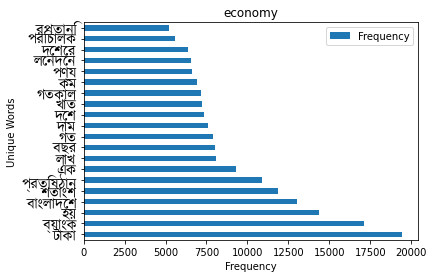

<Figure size 720x576 with 0 Axes>

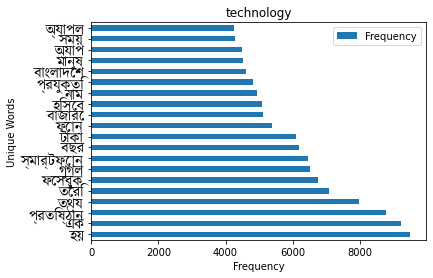

<Figure size 720x576 with 0 Axes>

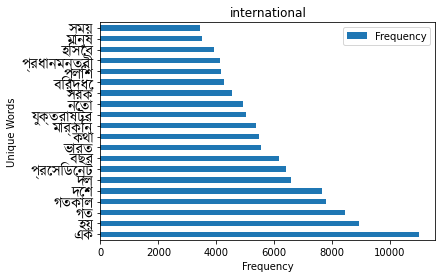

<Figure size 720x576 with 0 Axes>

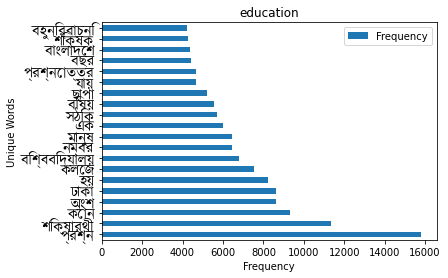

<Figure size 720x576 with 0 Axes>

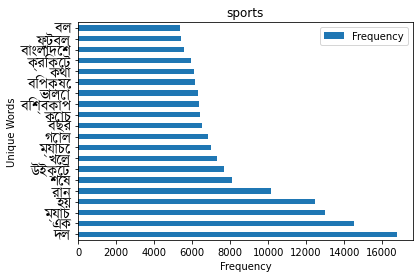

<Figure size 720x576 with 0 Axes>

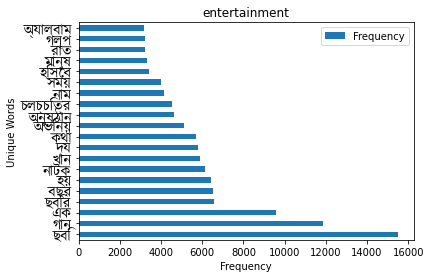

<Figure size 720x576 with 0 Axes>

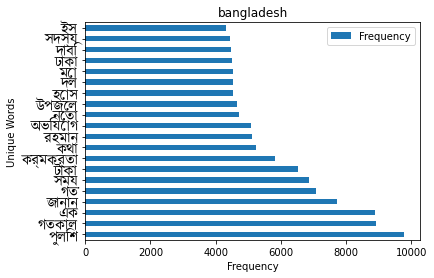

<Figure size 720x576 with 0 Axes>

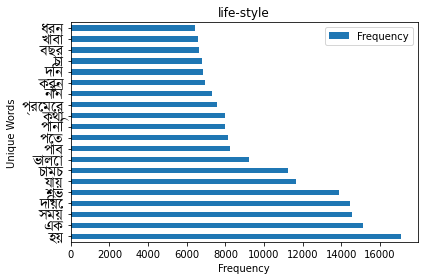

In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.content) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
    df=pd.DataFrame()
    path = 'drive/MyDrive/Bangla News Dataset/kalpurush.ttf'
    fontprop = fm.FontProperties(fname=path, size= 15)
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].content) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
          counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].content)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))

        df1=pd.DataFrame(ordered[:20],columns=['Word','Frequency'])
        df1['label']=label
        df=pd.concat([df,df1])   

        fig = plt.figure(figsize=(10,8));
        ax = df1[['Word','Frequency']].plot(kind='barh')
        ax.set_ylabel("Unique Words")
        ax.set_xlabel('Frequency')
        ax.set_title(label)
        ax.yaxis.set_ticklabels(df1['Word'],fontproperties=fontprop);
        print("\nClass Name : ",label)
        print(f"Number of Documents:{documents[-1]}")  
        print(f"Number of Words:{words[-1]}") 
        print(f"Number of Unique Words:{u_words[-1]}")
    plt.tight_layout()
    return documents,words,u_words,class_label,df

documents,words,u_words,class_names,df = data_summary(finalized_df)

In [ ]:
df['Word'].unique()

array(['টাকা', 'ব্যাংক', 'হয়', 'বাংলাদেশ', 'শতাংশ', 'প্রতিষ্ঠান', 'এক',
       'লাখ', 'বছর', 'গত', 'দাম', 'দেশ', 'খাত', 'গতকাল', 'কম', 'পণ্য',
       'লেনদেন', 'দেশের', 'পরিচালক', 'রপ্তানি', 'তথ্য', 'তৈরি', 'ফেসবুক',
       'গুগল', 'স্মার্টফোন', 'ফোন', 'বাজারে', 'হিসেব', 'নাম', 'প্রযুক্তি',
       'মানুষ', 'অ্যাপ', 'সময়', 'অ্যাপল', 'দল', 'প্রেসিডেন্ট', 'ভারত',
       'কথা', 'মার্কিন', 'যুক্তরাষ্ট্র', 'নেতা', 'সরক', 'বিরুদ্ধে',
       'পুলিশ', 'প্রধানমন্ত্রী', 'প্রশ্ন', 'শিক্ষার্থী', 'কোন', 'অংশ',
       'ঢাকা', 'কলেজ', 'বিশ্ববিদ্যালয়', 'নম্বর', 'সঠিক', 'বিষয়', 'ছাপা',
       'যায়', 'প্রশ্নোত্তর', 'শিক্ষক', 'বহুনির্বাচনি', 'ম্যাচ', 'রান',
       'শেষ', 'উইকেট', 'খেল', 'ম্যাচে', 'গোল', 'কোচ', 'বিশ্বকাপ', 'ভালো',
       'বিপক্ষে', 'ক্রিকেট', 'ফুটবল', 'বল', 'ছবি', 'গান', 'ছবির', 'নাটক',
       'খান', 'দ্য', 'অভিনয়', 'অনুষ্ঠান', 'চলচ্চিত্র', 'রাত', 'গল্প',
       'অ্যালবাম', 'জানান', 'সময়', 'কর্মকর্তা', 'রহমান', 'অভিযোগ',
       'উপজেল', 'হোস', 'মো', 'দাবি', 'সদস্য', 'ইস', 'দিয়ে', 'শুভ', '

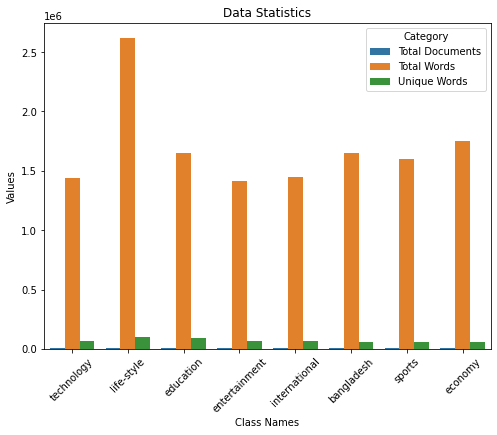

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [ ]:
import re
X_corpus=[]
for i in range(len(finalized_df)):
  df['Word'].unique()
  content=[for word in finalized_df.iloc[i,1].split() if word]
  content=" ".join(re.sub('[০১২৩৪৫৬৭৮৯\‘\’a-zA-Z0-9\-\_\–\—]', '', content).split())
  corpus['content'].append(content)
  corpus['label'].append(stemmed_txt[i][-1][0])

> **Label encoding**

In [ ]:
le = LabelEncoder()
y = le.fit_transform(finalized_df['label'].values)

In [ ]:
dic={'Label before encoding':le.inverse_transform(np.unique(y)),'Label after encoding':np.unique(y)}
pd.DataFrame(dic)

,Label before encoding,Label after encoding
0,bangladesh,0
1,economy,1
2,education,2
3,entertainment,3
4,international,4
5,life-style,5
6,sports,6
7,technology,7


> **Standard Scaler**

In [ ]:
def standard_scaler(x_train,x_test):
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  return x_train,x_test

### Function for evaluating test-set

In [ ]:
def evaluate_preds(Y_test,Y_pred):
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred,average='macro')
  recall=recall_score(Y_test,Y_pred,average='macro')
  f1=f1_score(Y_test,Y_pred,average='macro')
  metric_list=[round(accuracy*100,2),round(precision*100,2),round(recall*100,2),round(f1*100,2)]
  return metric_list

## **Tf-idf vectorizer**

In [ ]:
tfidf_v=TfidfVectorizer(max_features=3500,ngram_range=(1,3))
X_tfidf=tfidf_v.fit_transform(finalized_df['content'].values.tolist()).toarray()

#### Train-test split of tf-idf features

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

#### Feature Scaling

In [ ]:
X_train_sc,X_test_sc=standard_scaler(X_train_tfidf,X_test_tfidf)

In [ ]:
all_models={}

### **Linear SVC Model**

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train_sc, y_train_tfidf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Performance metrics for Linear-SVM

In [ ]:
y_pred = classifier.predict(X_test_sc)
cm = confusion_matrix(y_test_tfidf, y_pred)
print(cm)
accuracy_score(y_test_tfidf, y_pred)

[[2634  124   34   27   60   20    6   13]
 [ 187 2543   27    5   31   35   11  109]
 [  51   40 2649   27    4   67   14   30]
 [  57   24   43 2709   34   87   30   14]
 [ 100   55   13   58 2575   43   16   51]
 [  24   43   75   99   56 2512   25   80]
 [  16   14   20   46   38   46 2636   13]
 [  36  160   75   31   81  159   27 2362]]


0.8838026659808838

#### `Accuracy`, `Precision`, `Recall`, `F1-Score` of Linear-SVM

In [ ]:
perf_metrics=evaluate_preds(y_test_tfidf, y_pred)
all_models['SVM-Linear']=perf_metrics
pd.DataFrame(all_models,index=['Accuracy','Precision','Recall','F1-Score'])

,SVM-Linear
Accuracy,88.38
Precision,88.47
Recall,88.40
F1-Score,88.40


#### Classification report

In [ ]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2918
           1       0.85      0.86      0.85      2948
           2       0.90      0.92      0.91      2882
           3       0.90      0.90      0.90      2998
           4       0.89      0.88      0.89      2911
           5       0.85      0.86      0.85      2914
           6       0.95      0.93      0.94      2829
           7       0.88      0.81      0.84      2931

    accuracy                           0.88     23331
   macro avg       0.88      0.88      0.88     23331
weighted avg       0.88      0.88      0.88     23331



#### Confusion matrix

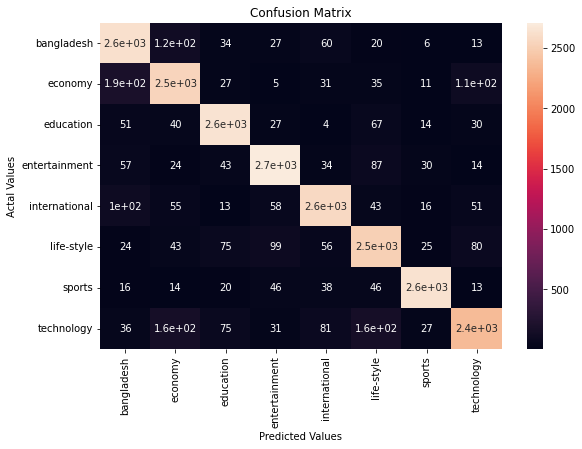

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = le.inverse_transform(np.arange(8)), 
                     columns = le.inverse_transform(np.arange(8)))
plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### Save the linear-svm model

In [ ]:
pickle.dump(classifier,open("drive/MyDrive/Bangla News Dataset/linear_svm.pkl","wb"))

### **Kernel-SVM model**

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train_sc, y_train_tfidf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test_sc)

#### `Accuracy`, `Precision`, `Recall`, `F1-Score` of SVM-RBF

In [ ]:
perf_metrics=evaluate_preds(y_test_tfidf, y_pred)
all_models['SVM-RBF']=perf_metrics
pd.DataFrame(all_models,index=['Accuracy','Precision','Recall','F1-Score'])

,SVM-RBF
Accuracy,91.80
Precision,91.84
Recall,91.81
F1-Score,91.81


#### Classification report

In [ ]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2918
           1       0.88      0.91      0.90      2948
           2       0.94      0.93      0.93      2882
           3       0.93      0.94      0.93      2998
           4       0.90      0.94      0.92      2911
           5       0.91      0.89      0.90      2914
           6       0.96      0.96      0.96      2829
           7       0.90      0.89      0.89      2931

    accuracy                           0.92     23331
   macro avg       0.92      0.92      0.92     23331
weighted avg       0.92      0.92      0.92     23331



#### Confusion matrix

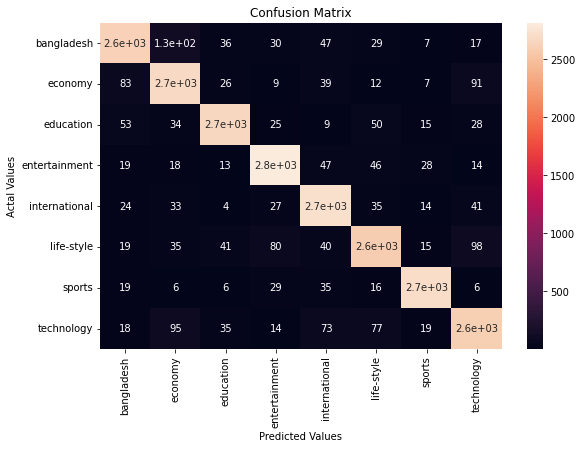

In [ ]:
cm = confusion_matrix(y_test_tfidf, y_pred)
cm_df = pd.DataFrame(cm,
                     index = le.inverse_transform(np.arange(8)), 
                     columns = le.inverse_transform(np.arange(8)))
plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### Save the svm-rbf model

In [ ]:
pickle.dump(classifier,open("drive/MyDrive/Bangla News Dataset/rbf_svm.pkl","wb"))

### **Gaussian Naive Bayes**

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_sc, y_train_tfidf)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test_sc)

#### `Accuracy`, `Precision`, `Recall`, `F1-Score` of Gaussian-Naive Bayes



In [ ]:
perf_metrics=evaluate_preds(y_test_tfidf, y_pred)
all_models['Gaussian-NB']=perf_metrics
pd.DataFrame(all_models,index=['Accuracy','Precision','Recall','F1-Score'])

,SVM-RBF,Gaussian-NB
Accuracy,91.80,80.21
Precision,91.84,81.62
Recall,91.81,80.26
F1-Score,91.81,80.13


#### Classification report

In [ ]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78      2918
           1       0.85      0.70      0.77      2948
           2       0.93      0.85      0.89      2882
           3       0.79      0.82      0.81      2998
           4       0.78      0.83      0.80      2911
           5       0.91      0.61      0.73      2914
           6       0.83      0.89      0.86      2829
           7       0.77      0.79      0.78      2931

    accuracy                           0.80     23331
   macro avg       0.82      0.80      0.80     23331
weighted avg       0.82      0.80      0.80     23331



#### Confusion matrix


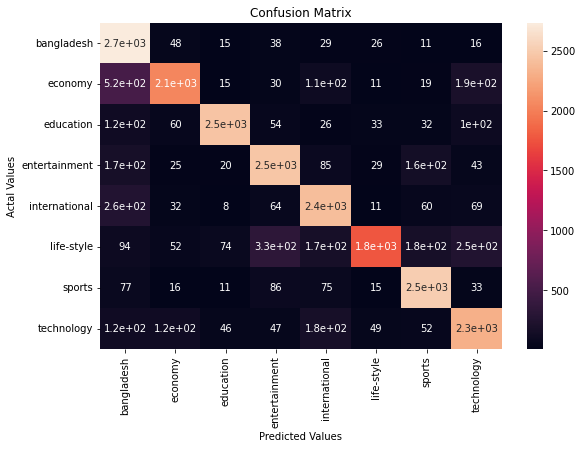

In [ ]:
cm = confusion_matrix(y_test_tfidf, y_pred)
cm_df = pd.DataFrame(cm,
                     index = le.inverse_transform(np.arange(8)), 
                     columns = le.inverse_transform(np.arange(8)))
plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### Save the gaussian-nb model

In [ ]:
pickle.dump(classifier,open("drive/MyDrive/Bangla News Dataset/gaussian_nb.pkl","wb"))

### **Multinomial Naive Bayes**

In [ ]:
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test_tfidf)

#### `Accuracy`, `Precision`, `Recall`, `F1-Score` of Multinomial-Naive Bayes

In [ ]:
perf_metrics=evaluate_preds(y_test_tfidf, y_pred)
all_models['Multinomial-NB']=perf_metrics
pd.DataFrame(all_models,index=['Accuracy','Precision','Recall','F1-Score'])

,SVM-RBF,Gaussian-NB,Multinomial-NB
Accuracy,91.80,80.21,88.12
Precision,91.84,81.62,88.34
Recall,91.81,80.26,88.13
F1-Score,91.81,80.13,88.16


#### Classification report

In [ ]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2918
           1       0.84      0.86      0.85      2948
           2       0.94      0.86      0.90      2882
           3       0.87      0.91      0.89      2998
           4       0.88      0.91      0.89      2911
           5       0.89      0.81      0.85      2914
           6       0.95      0.92      0.94      2829
           7       0.82      0.88      0.85      2931

    accuracy                           0.88     23331
   macro avg       0.88      0.88      0.88     23331
weighted avg       0.88      0.88      0.88     23331



#### Confusion matrix

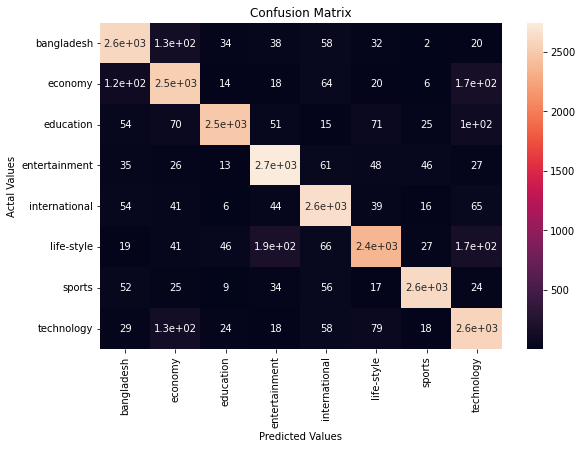

In [ ]:
cm = confusion_matrix(y_test_tfidf, y_pred)
cm_df = pd.DataFrame(cm,
                     index = le.inverse_transform(np.arange(8)), 
                     columns = le.inverse_transform(np.arange(8)))
plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### Save the multinomial-nb model

In [ ]:
pickle.dump(classifier,open("drive/MyDrive/Bangla News Dataset/multinomial_nb.pkl","wb"))

### **Load the Linear-SVM model**

In [ ]:
classifier=pickle.load(open("drive/MyDrive/Bangla News Dataset/linear_svm.pkl","rb"))
y_pred=classifier.predict(X_test_sc)
perf_metrics=evaluate_preds(y_test_tfidf, y_pred)
all_models['SVM-Linear']=perf_metrics
pd.DataFrame(all_models,index=['Accuracy','Precision','Recall','F1-Score'])

,SVM-RBF,Gaussian-NB,Multinomial-NB,SVM-Linear
Accuracy,91.80,80.21,88.12,88.38
Precision,91.84,81.62,88.34,88.47
Recall,91.81,80.26,88.13,88.40
F1-Score,91.81,80.13,88.16,88.40


### **Save the performance metrics of all models**

In [ ]:
perf_df=pd.DataFrame(list(all_models.values()),columns=['Accuracy','Precision','Recall','F1-Score'],index=list(all_models.keys()))
perf_df.to_csv('drive/MyDrive/Bangla News Dataset/performance_df.csv')

### **Load the performance metrics of all models**

In [ ]:
perf_df=pd.read_csv('drive/MyDrive/Bangla News Dataset/performance_df.csv',index_col='Unnamed: 0')
perf_df

,Accuracy,Precision,Recall,F1-Score
SVM-RBF,91.80,91.84,91.81,91.81
Gaussian-NB,80.21,81.62,80.26,80.13
Multinomial-NB,88.12,88.34,88.13,88.16
SVM-Linear,88.38,88.47,88.40,88.40


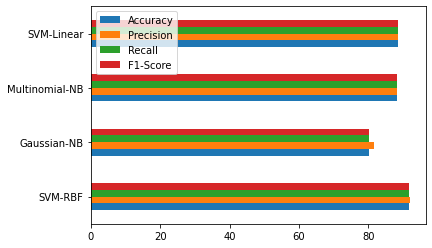

In [ ]:
perf_df.plot(kind='barh')
plt.legend(bbox_to_anchor=(0., 1.), loc='upper left', borderaxespad=0.5);